In [1]:
%load_ext autoreload
%load_ext memory_profiler
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

from tempest import casestudy
from tempest import grid
from tempest import storm_tracker
from tempest import joint_distrib
from tempest import handler
from tempest.plots.hist import simple_hist
settings_path = 'settings/tropics_20d.yaml'

In [3]:
# Instantiate CaseStudy by passing the settings. 
# Should also create appropriate directories
hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False)
gr = grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False)
st = storm_tracker.StormTracker(gr, overwrite = False) #overwrite = True is super long

Data loaded from /scratchx/mcarenso/tempest/DYAMOND_SAM_post_20_days_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/DYAMOND_SAM_post_20_days_Tropics/grid_attributes.pkl instead of computing
Loading storms...
Loading storms again because overwrite_storms is True
/bdd/MT_WORKSPACE/lgouttes/MODELS/DYAMOND/Summer/SAM/235K/TOOCAN_EMC2/TOOCAN_v2.08/GLOBAL/2016/FileTracking/TOOCAN-SAM-20160801-20160831.dat.gz
/bdd/MT_WORKSPACE/lgouttes/MODELS/DYAMOND/Summer/SAM/235K/TOOCAN_EMC2/TOOCAN_v2.08/GLOBAL/2016/FileTracking/TOOCAN-SAM-20160901-20160910.dat.gz
Time elapsed for loading storms: 82.54 seconds


# Make the surface x treshold joint distrib

In [4]:
jd = joint_distrib.JointDistribution(gr, st, 
                                     var_id_1= "Sigma_cond_alpha_50_Prec", 
                                     var_id_2="Treshold_cond_alpha_50_Prec", 
                                     overwrite = True, 
                                     dist_bintype = 'invlogQ')

Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Time elapsed for propagating all labels: 4.20 seconds


In [5]:
lm = gr.get_landmask()
land = lm.Landmask == 1
ocean = lm.Landmask == 0

## OM850 cond by Prec with lag 1 over Ocean

/home/mcarenso/code/tempest/tempest/joint_distrib.py:886: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = label)


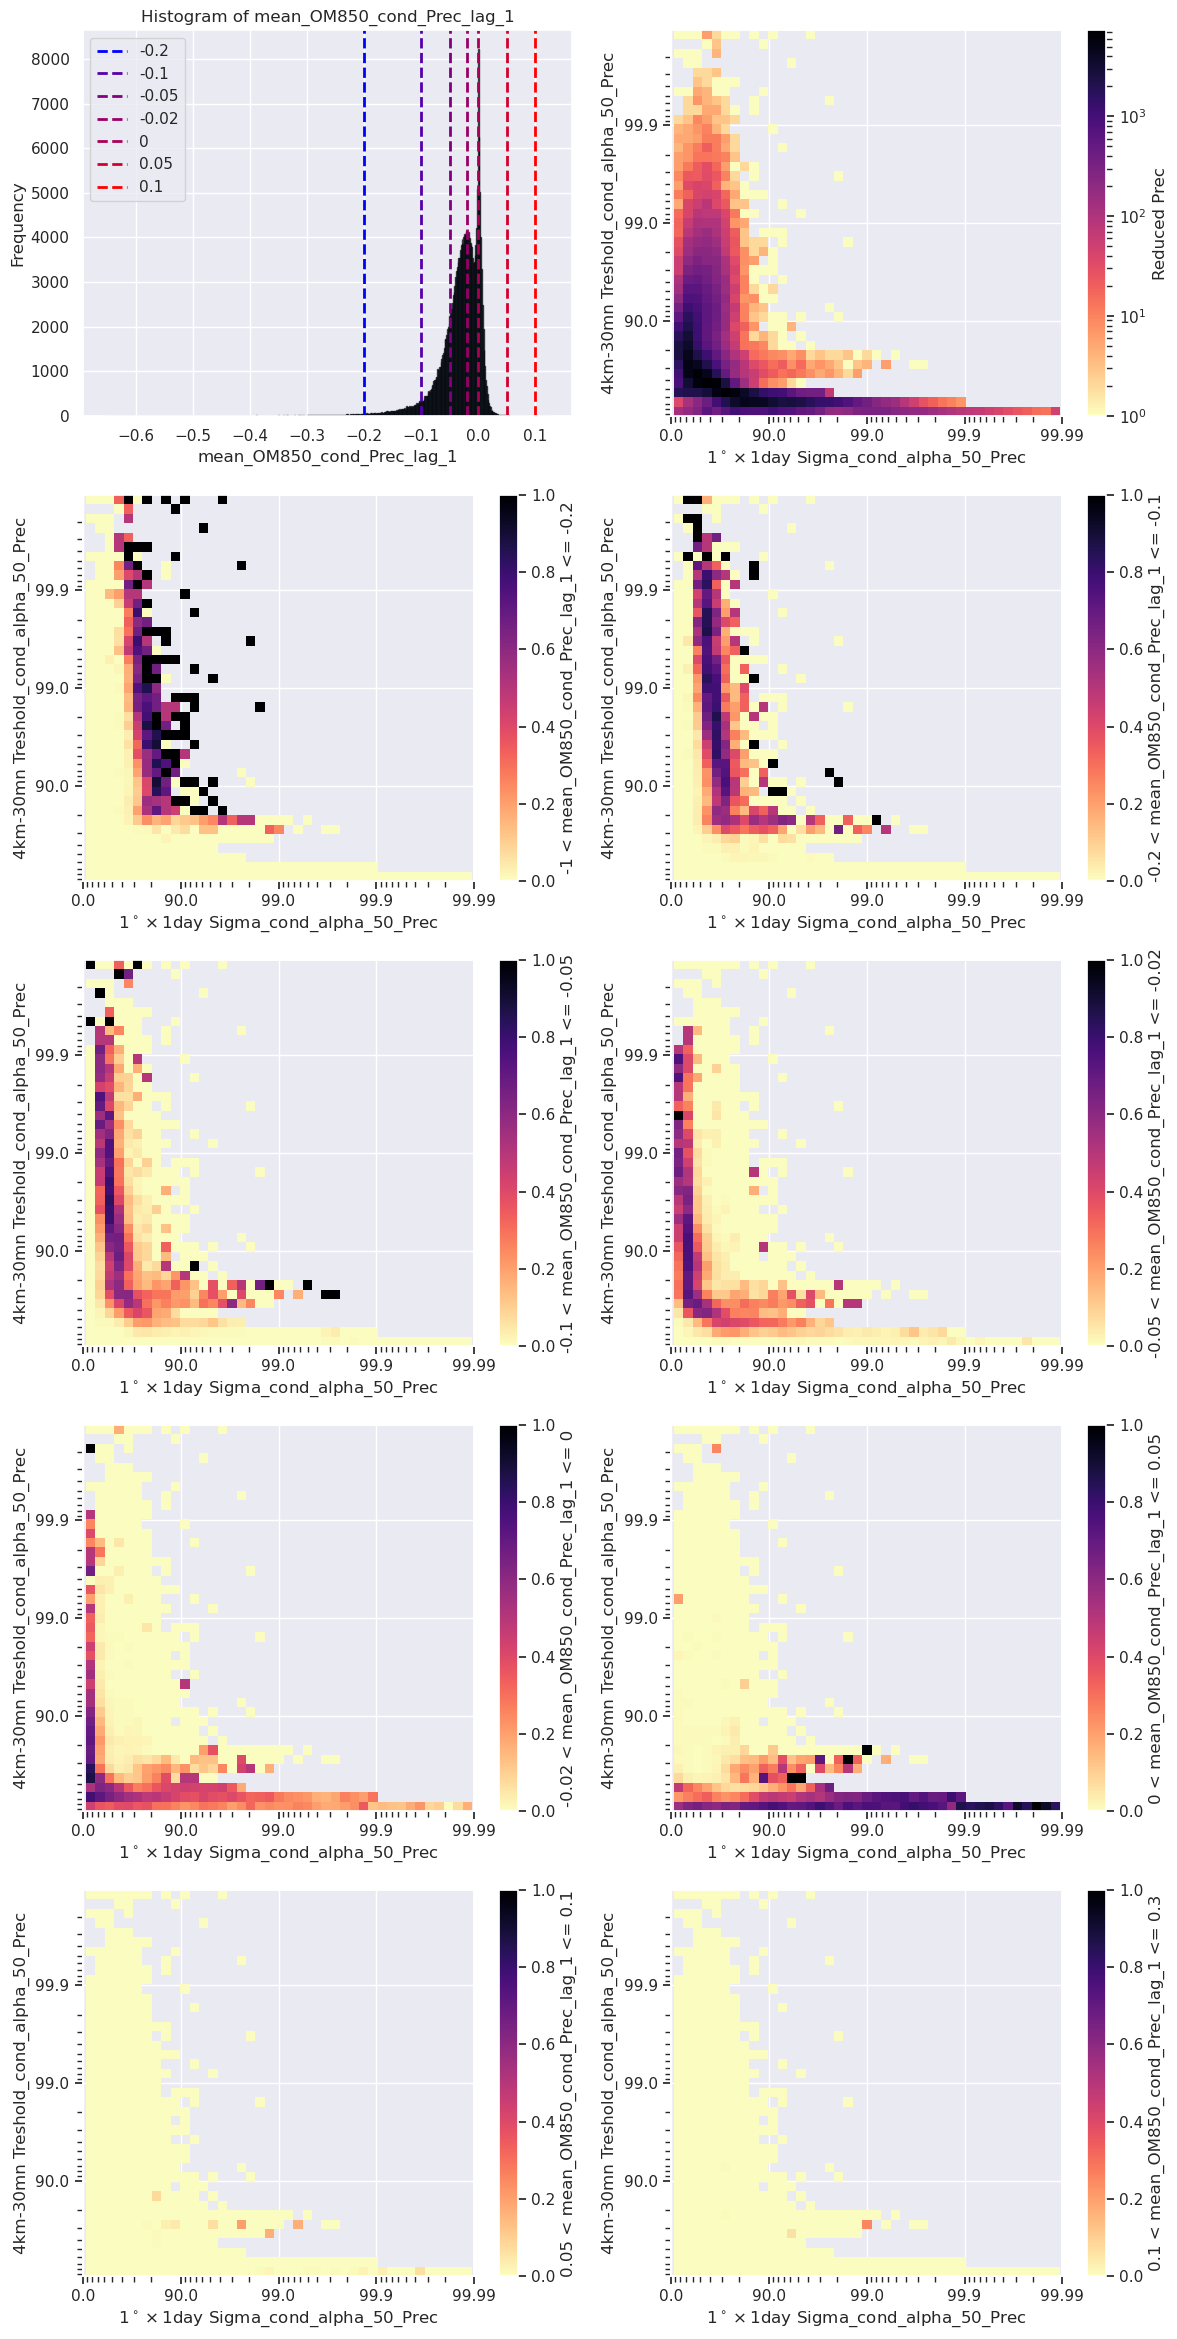

In [6]:
%matplotlib inline
cond_var = [-1, -0.2, -0.1, -0.05, -0.02, 0, 0.05, 0.1, 0.3]
var_id = "OM850_cond_Prec_lag_1"
func = "mean"
bincounts = jd.process_plot_var_cond_reducing_prec(var_id, cond_var, mask = ocean, func=func)
plt.tight_layout()

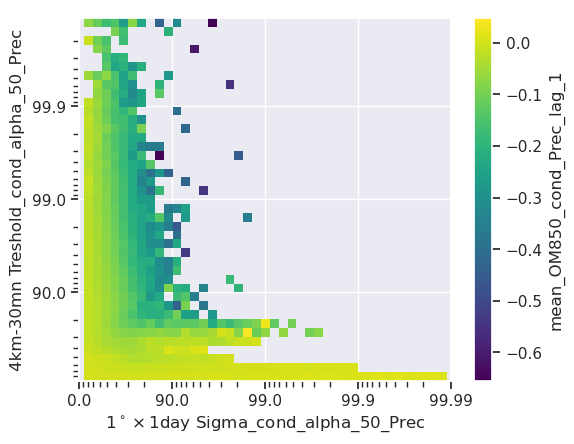

In [7]:
jd.plot_var_id_func_over_jdist('OM850_cond_Prec_lag_1', func = 'mean', mask = ocean)

## QV* 2D

In [8]:
var_id = "QV_sat_2d"
func = "mean"

/home/mcarenso/code/tempest/tempest/joint_distrib.py:886: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = label)


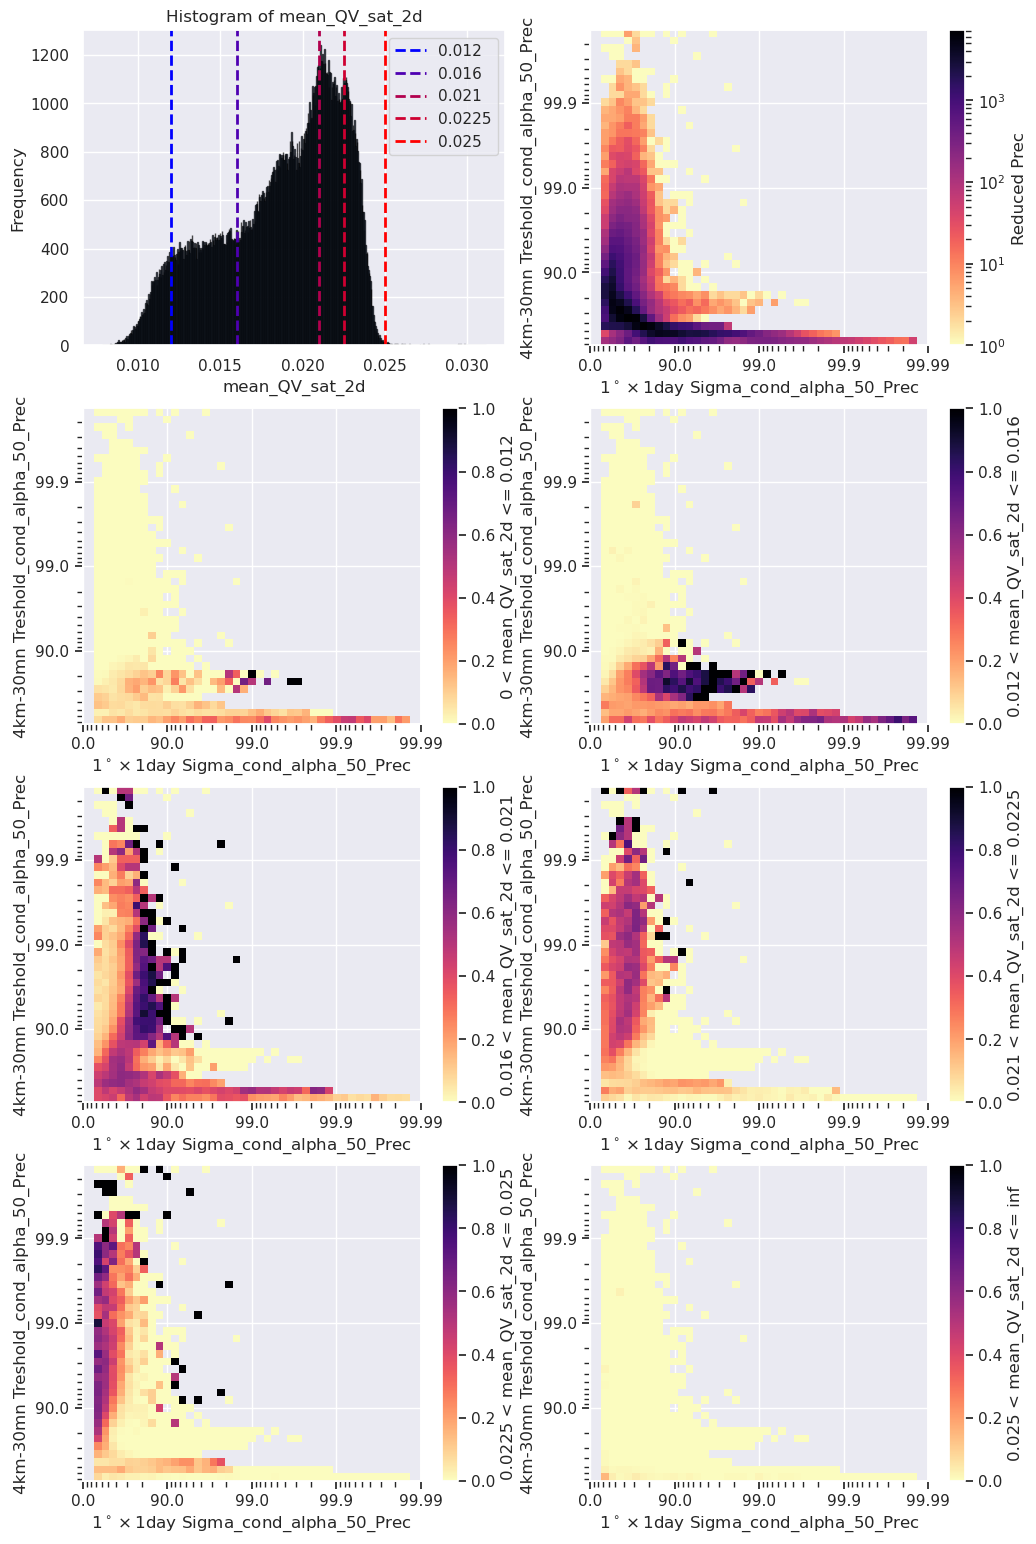

In [9]:
%matplotlib inline

cond_var = [0, 0.012, 0.016, 0.021, 0.0225, 0.025, +np.inf]
bincounts = jd.process_plot_var_cond_reducing_prec(var_id, cond_var, mask = ocean, func=func)

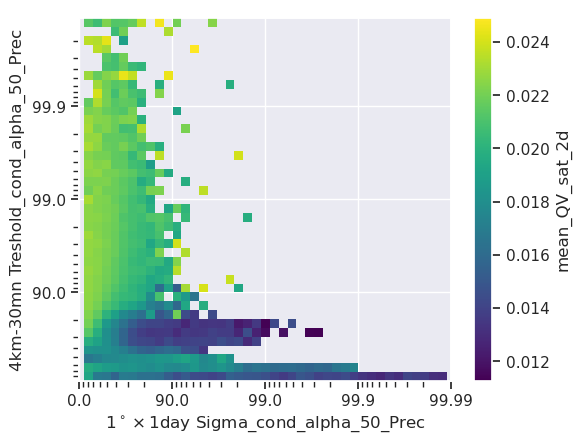

In [10]:
jd.plot_var_id_func_over_jdist(var_id, func = func, mask = ocean)

In [15]:
var = gr.get_var_id_ds(var_id)

## MCS

/home/mcarenso/code/tempest/tempest/joint_distrib.py:712: RuntimeWarning: invalid value encountered in scalar divide
  bin_fraction_mcs[i_bin,j_bin] = count_bin_mcs/count_bin


<AxesSubplot:xlabel='1$^\\circ\\times 1$day Sigma_cond_alpha_50_Prec', ylabel='4km-30mn Treshold_cond_alpha_50_Prec'>

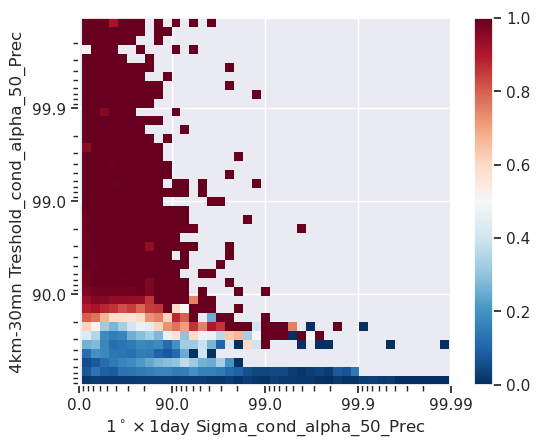

In [8]:
data, noise, count = jd.get_mcs_bin_fraction(0)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4.76))
jd.plot_data(data, noise, branch=False, fig= fig, ax = ax, vbds = (0, 1))

In [18]:
jd.dist2.bins

array([0.00000000e+00, 6.80732727e-03, 3.38134766e-02, 7.49617219e-02,
       3.12805176e-01, 7.62569464e-01, 1.60227735e+00, 3.05438971e+00,
       4.76053788e+00, 6.22265107e+00, 7.35071790e+00, 8.26577140e+00,
       9.01507462e+00, 9.64692794e+00, 1.02275685e+01, 1.07385835e+01,
       1.12296519e+01, 1.16652576e+01, 1.20858149e+01, 1.24898288e+01,
       1.28891967e+01, 1.32478461e+01, 1.36268847e+01, 1.40046548e+01,
       1.43459167e+01, 1.47177740e+01, 1.50863800e+01, 1.54534885e+01,
       1.58574342e+01, 1.62457260e+01, 1.66019206e+01, 1.70369242e+01,
       1.74058865e+01, 1.78316885e+01, 1.84084216e+01, 1.88022412e+01,
       1.92683418e+01, 1.97375061e+01, 2.04979036e+01, 2.10215009e+01,
       2.15515198e+01, 3.37175293e+01])

In [22]:
jd.dist2.percentiles

array([ 0.        ,  0.02235031,  0.05284839,  0.1759717 ,  0.51515274,
        1.14083652,  2.28771499,  3.97574368,  5.57204159,  6.85309674,
        7.85870972,  8.68463734,  9.3637085 ,  9.96112061, 10.4983899 ,
       10.9959247 , 11.46748971, 11.88973014, 12.30587317, 12.71196144,
       13.06926102, 13.45506682, 13.83406999, 14.17492978, 14.53817738,
       14.90482132, 15.27429505, 15.67750982, 16.05985574, 16.45972885,
       16.81845367, 17.23913209, 17.62740611, 18.0830285 , 18.63182296,
       19.08218843, 19.59847741, 20.19847361, 20.88461154, 21.39814827,
       21.80536393])

# Joint distrib with Rcond instead of treshold

In [14]:
jd = joint_distrib.JointDistribution(gr, st, 
                                     var_id_1= "Sigma_cond_alpha_50_Prec", 
                                     var_id_2="Treshold_cond_alpha_50_Prec", 
                                     overwrite = True, 
                                     dist_bintype = 'invlogQ')

ds not found so forcing opening with xarray...
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Time elapsed for propagating all labels: 4.01 seconds


ds not found so forcing opening with xarray...


/home/mcarenso/code/tempest/tempest/joint_distrib.py:907: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = label)


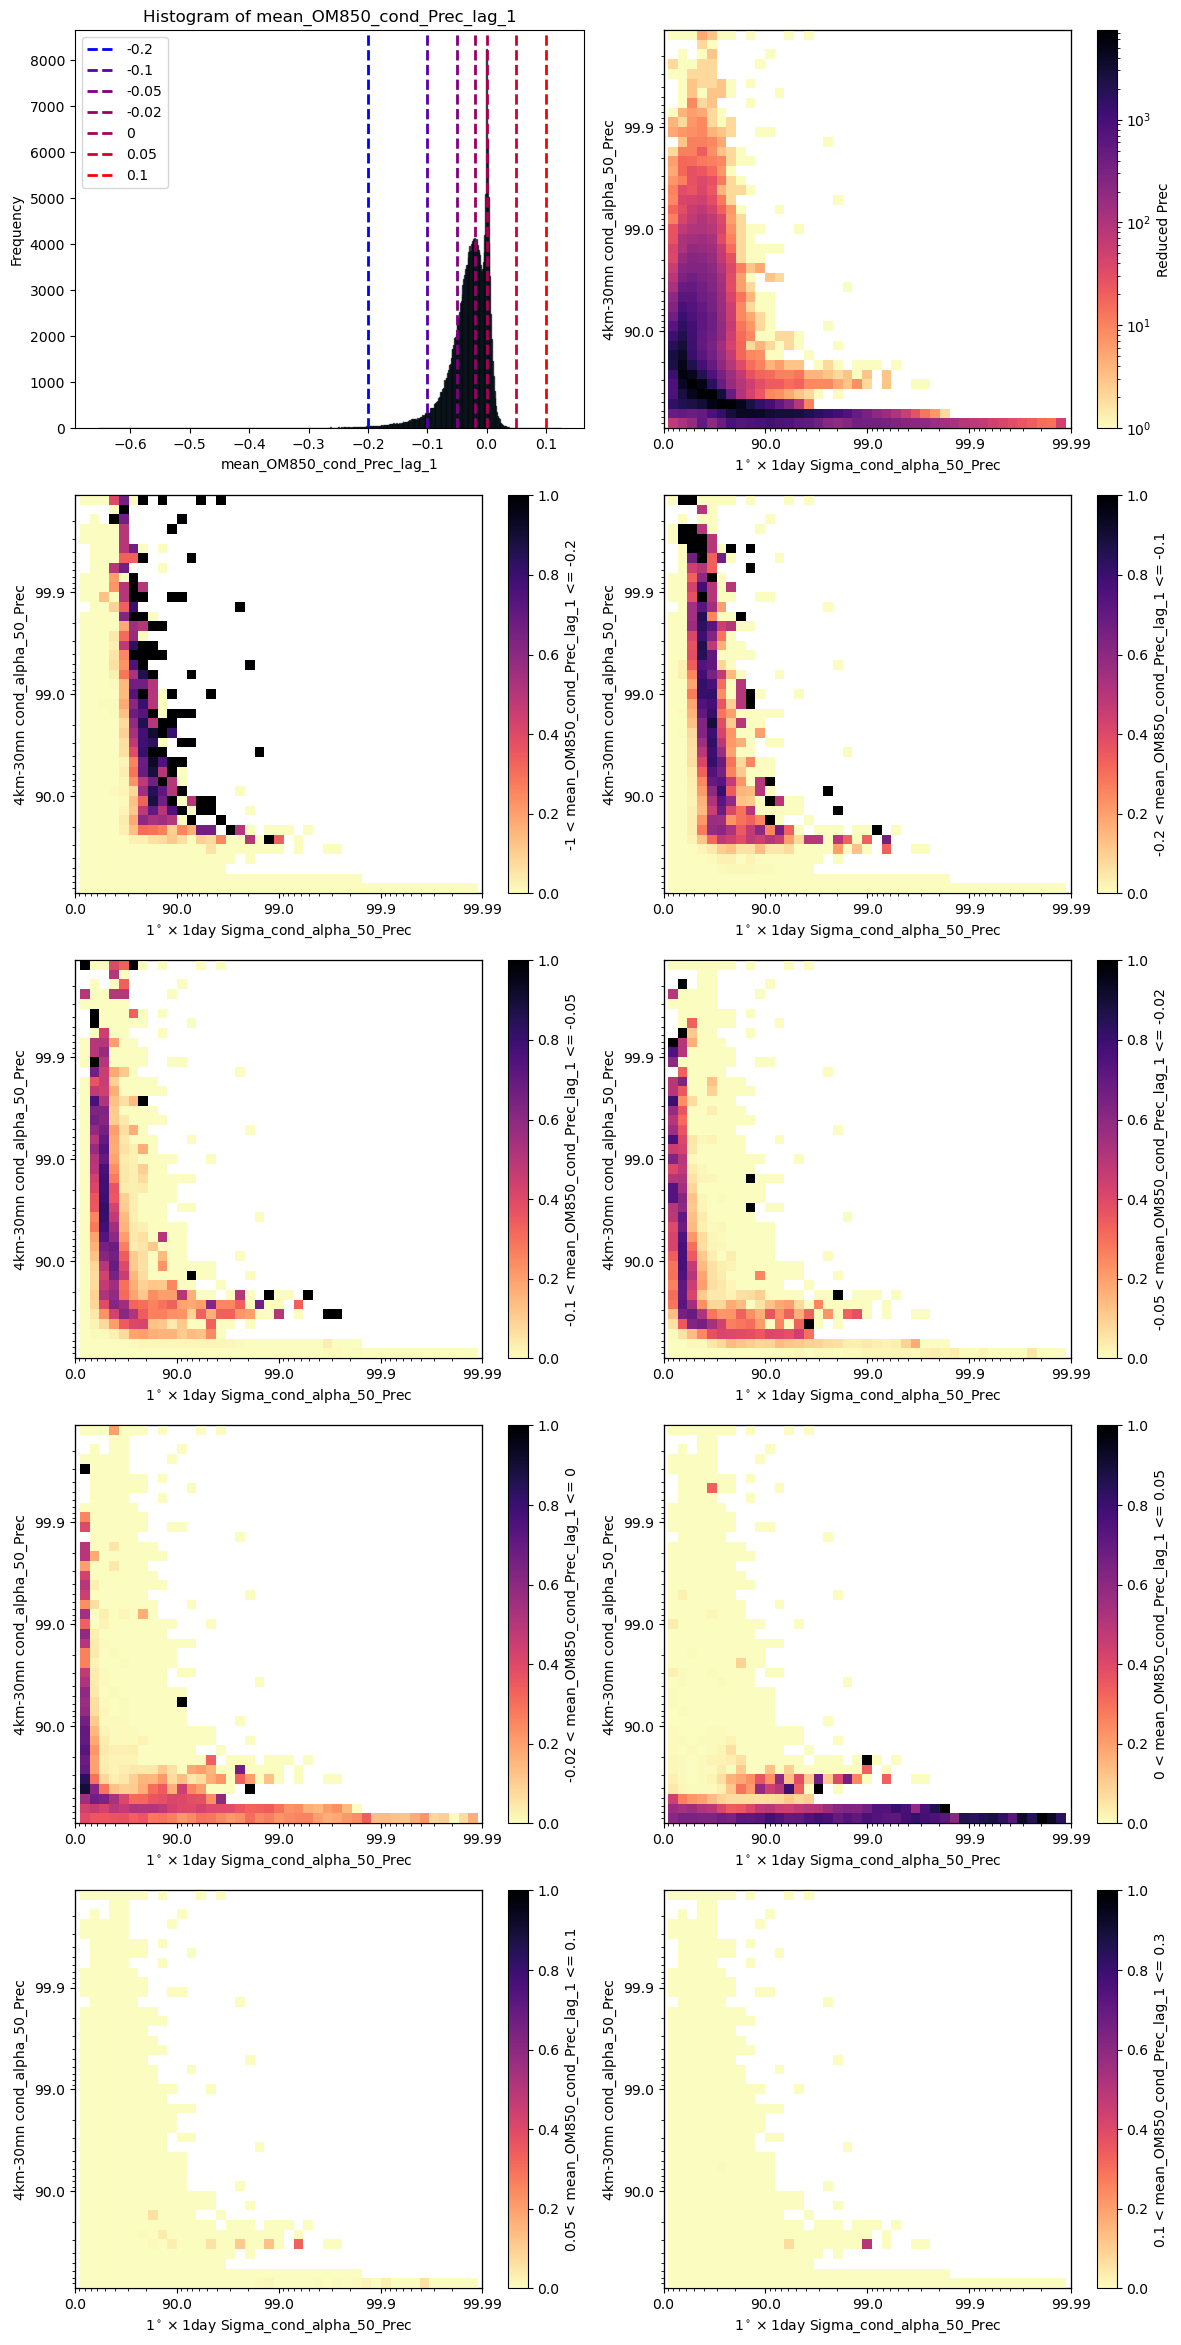

In [15]:
%matplotlib inline
cond_var = [-1, -0.2, -0.1, -0.05, -0.02, 0, 0.05, 0.1, 0.3]
var_id = "OM850_cond_Prec_lag_1"
func = "mean"
bincounts = jd.process_plot_var_cond_reducing_prec(var_id, cond_var, mask = ocean, func=func)
plt.tight_layout()

ds not found so forcing opening with xarray...


/home/mcarenso/code/tempest/tempest/joint_distrib.py:907: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = label)


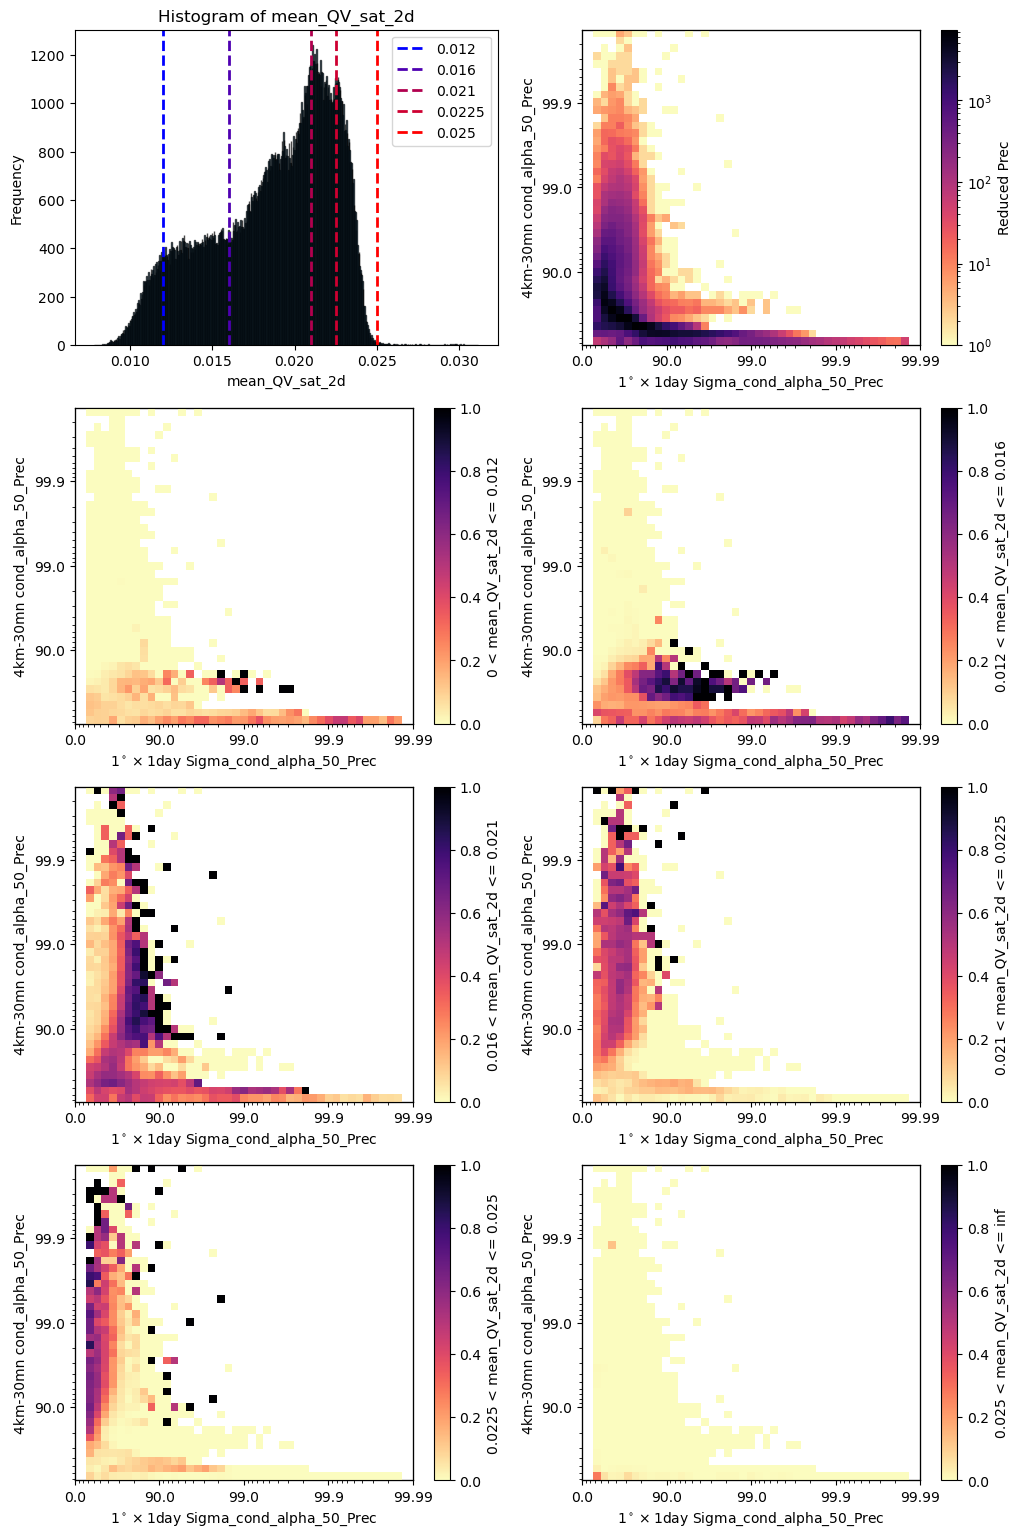

In [17]:
%matplotlib inline

cond_var = [0, 0.012, 0.016, 0.021, 0.0225, 0.025, +np.inf]
var_id = "QV_sat_2d"
func = "mean"
bincounts = jd.process_plot_var_cond_reducing_prec(var_id, cond_var, mask = ocean, func=func)

#### dev that shouldnt have been here  but became necessary while in task

 ""

In [ ]:
def compute_conditional_data_over_density(self, data = None, mask = None):         
    var_days = list(data.days.values)  
    n_i, n_j = self.bincount.shape
    
    if data is not None : 
        data_over_density = np.full(shape=(n_i,n_j), fill_value=np.nan)
        if mask is not None : 
            data = data.where(mask)
            
    for d2 in range(n_j): 
            for d1 in range(n_i):
                data_where_joint_bin = self.get_mask_yxt(d1, d2, var_days=var_days)
                # return data_where_joint_bin
                # data_idx = tuple(np.argwhere((digit1==i1) & (digit2==i2)).T)
                if np.any(data_where_joint_bin==True):
                    to_mean = data.where(data_where_joint_bin)
                    if not np.all(np.isnan(to_mean)):
                        data_over_density[d1, d2] = np.nanmean(to_mean)
    if data is not None:
        return data_over_density
    
    
def plot_var_id_func_over_jdist(self, var_id, func, mask, cmap = plt.cm.viridis, vbds = (None, None), fig = None, ax = None):
    key = func+'_'+var_id
        # Trying to avoid the prec bug, maybe it's due to prec dataset already being open within jd
    if var_id == "Prec" : 
        ds_var = self.prec.sortby("days")[key]
    else :  
        ds_var = self.grid.get_var_id_ds(var_id).sortby("days")[key]
        
    var_days = list(ds_var.days.values)
    ds_var = ds_var.sel(days = var_days).where(mask) # redundant ? 
    
    var_over_density = self.compute_conditional_data_over_density(ds_var, mask = mask) #more a da than ds but whatever
    if fig is None : 
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 4.71))
    self.plot_data(var_over_density, data_noise = None, cmap = cmap, branch=False, vbds = vbds, fig = fig, ax = ax)